In [1]:
##Integrantes: Carla Rosetti, Juliana Benitez, Pablo Roldan

# Limpieza de datos

Vamos a aplicar el [checklist del Banco Mundial](https://dimewiki.worldbank.org/wiki/Checklist:_Data_Cleaning) en Python usando el [SciPy stack](https://www.scipy.org/stackspec.html), principalmente pandas

## 0. Prerequisitos

Aclaración: La próxima celda es para compatilibidad con Colab, NO ES RECOMENDADO realizar pip install desde un notebook.

In [2]:
import sys
in_colab = 'google.colab' in sys.modules

if in_colab:
  BASE_DIR = "https://github.com/DiploDatos/AnalisisYCuracion/raw/master/"
else:
  BASE_DIR = ".."
if 'ftfy' not in sys.modules:
    !pip install 'ftfy<5.6'

# 1. Importando los datos

# 1.1. Verificar que no hay problemas en la importación

In [3]:
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format

Veamos de importar datos de proyectos de Kickstarter la plataforma de Crowdsourcing

In [4]:
kickstarter_2016 = pd.read_csv(BASE_DIR + "/input/kickstarter-projects/ks-projects-201612.csv")

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x99 in position 11: invalid start byte

Por defecto Pandas falla si hay errores para leer datos https://pandas.pydata.org/pandas-docs/stable/io.html#error-handling

Por ahora cambiamos a un archivo más actualizado, volveremos a este error más adelante

In [5]:
kickstarter_2018 = pd.read_csv(BASE_DIR + "/input/kickstarter-projects/ks-projects-201801.csv")

Veamos los datos cargados en el dataframe

In [6]:
kickstarter_2018

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.00,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.00,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.00,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.00,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.00,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.00,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.00,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.00
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.00,2016-02-01 20:05:12,453.00,failed,40,US,453.00,453.00,25000.00
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.00,2014-04-24 18:14:43,8233.00,canceled,58,US,8233.00,8233.00,125000.00
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.00,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57,6240.57,65000.00


Por defecto solo vemos los valores al comienzo o al final del archivo.

Tomemos una muestra al azar para ver valores más dispersos

In [7]:
# set seed for reproducibility
import numpy as np
np.random.seed(0)

In [8]:
kickstarter_2018.sample(5)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
338862,796196901,10G Christmas Tree,Art,Art,USD,2010-12-26,10526.00,2010-12-08 08:44:04,0.00,failed,0,US,0.00,0.00,10526.00
277871,483825010,Gliff,Gaming Hardware,Games,USD,2016-03-28,10000.00,2016-01-28 04:56:18,51.00,failed,5,US,51.00,51.00,10000.00
47000,123916947,STUFFED Food Truck,Food Trucks,Food,USD,2015-01-06,60000.00,2014-11-07 02:24:36,25.00,failed,1,US,25.00,25.00,60000.00
111338,1565733636,NeoExodus Adventure: Origin of Man for Pathfin...,Tabletop Games,Games,USD,2012-05-01,500.00,2012-03-15 01:16:10,585.00,successful,17,US,585.00,585.00,500.00
53743,1273544891,NAPOLEON IN NEW YORK! an original TV Series,Comedy,Film & Video,USD,2016-07-26,25000.00,2016-05-27 00:07:25,25.00,failed,1,US,25.00,25.00,25000.00


No se observa a simple vista ningún problema obvio.

Notar que todos vimos los mismos resultados. Al fijar la semilla no hubo tal azar, esto es algo necesario cuando queremos "reproducir valores aleatorios"

Veamos la descripción del dataset si se corresponde con lo levantado https://www.kaggle.com/kemical/kickstarter-projects/data

In [9]:
pd.DataFrame([["ID", "No description provided", "Numeric"],
["name", "No description provided", "String"],
["category", "No description provided", "String"],
["main_category", "No description provided", "String"],
["currency", "No description provided", "String"],
["deadline", "No description provided", "DateTime"],
["goal", "Goal amount in project currency", "Numeric"],
["launched", "No description provided", "DateTime"],
["pledged", "Pledged amount in the project currency", "Numeric"],
["state", "No description provided", "String"],
["backers", "No description provided", "Numeric"],
["country", "No description provided", "String"],
["usd pledged", "Pledged amount in USD (conversion made by KS)", "Numeric"],
["usd_pledged_real", "Pledged amount in USD (conversion made by fixer.io api)", "Numeric"],
["usd_goal_real", "Goal amount in USD", "Numeric"]], columns=["Field name","Field description", "Type"])

,Field name,Field description,Type
0,ID,No description provided,Numeric
1,name,No description provided,String
2,category,No description provided,String
3,main_category,No description provided,String
4,currency,No description provided,String
5,deadline,No description provided,DateTime
6,goal,Goal amount in project currency,Numeric
7,launched,No description provided,DateTime
8,pledged,Pledged amount in the project currency,Numeric
9,state,No description provided,String


Ahora veamos los tipos de datos que detectó pandas

In [10]:
kickstarter_2018.dtypes

ID                    int64
name                 object
category             object
main_category        object
currency             object
deadline             object
goal                float64
launched             object
pledged             float64
state                object
backers               int64
country              object
usd pledged         float64
usd_pledged_real    float64
usd_goal_real       float64
dtype: object

Los campos object generalmente son String, entonces parece que no reconoció como fechas en **deadline** y **launched** :(

Veamos los datos un resumen de los datos

In [11]:
kickstarter_2018.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,378661.00,378661.00,378661.00,378661.00,374864.00,378661.00,378661.00
mean,1074731191.99,49080.79,9682.98,105.62,7036.73,9058.92,45454.40
std,619086204.32,1183391.26,95636.01,907.19,78639.75,90973.34,1152950.06
min,5971.00,0.01,0.00,0.00,0.00,0.00,0.01
25%,538263516.00,2000.00,30.00,2.00,16.98,31.00,2000.00
50%,1075275634.00,5200.00,620.00,12.00,394.72,624.33,5500.00
75%,1610148624.00,16000.00,4076.00,56.00,3034.09,4050.00,15500.00
max,2147476221.00,100000000.00,20338986.27,219382.00,20338986.27,20338986.27,166361390.71


Por defecto se ven los datos numéricos, veamos el resto.

In [12]:
kickstarter_2018.describe(include=['object'])

,name,category,main_category,currency,deadline,launched,state,country
count,378657,378661,378661,378661,378661,378661,378661,378661
unique,375764,159,15,14,3164,378089,6,23
top,New EP/Music Development,Product Design,Film & Video,USD,2014-08-08,1970-01-01 01:00:00,failed,US
freq,41,22314,63585,295365,705,7,197719,292627


Operemos un cacho sobre los datos de lanzamiento

In [13]:
kickstarter_2018['launched'].min()

'1970-01-01 01:00:00'

Parece funcionar, pero ahora calculemos el rango de fechas de los proyectos

In [14]:
kickstarter_2018['launched'].max() - kickstarter_2018['launched'].min()

TypeError: unsupported operand type(s) for -: 'str' and 'str'

Indiquemos que columnas son fechas como indica la [documentación](https://pandas.pydata.org/pandas-docs/stable/io.html#datetime-handling)

In [15]:
kickstarter_2018 = pd.read_csv(BASE_DIR + "/input/kickstarter-projects/ks-projects-201801.csv", 
                               parse_dates=["deadline","launched"])
kickstarter_2018.dtypes

ID                           int64
name                        object
category                    object
main_category               object
currency                    object
deadline            datetime64[ns]
goal                       float64
launched            datetime64[ns]
pledged                    float64
state                       object
backers                      int64
country                     object
usd pledged                float64
usd_pledged_real           float64
usd_goal_real              float64
dtype: object

Ahora vemos que esas columnas fueron reconocidas como fechas

Veamos la misma muestra de nuevo

In [16]:
kickstarter_2018.sample(5)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
299667,595962034,Button Poetry Live!,Mixed Media,Art,USD,2015-09-18,10000.00,2015-08-19 19:34:20,18216.27,successful,455,US,18216.27,18216.27,10000.00
181674,1924707671,"C STREET 2012 : Tbilisi, Georgia",World Music,Music,USD,2012-06-07,5000.00,2012-05-08 18:22:59,7210.69,successful,82,US,7210.69,7210.69,5000.00
137583,1698707842,Dérive's Next Project,Punk,Music,USD,2014-07-06,1200.00,2014-06-08 17:58:37,1255.66,successful,33,US,1255.66,1255.66,1200.00
296861,581269566,Photo Book - World Santa Claus Congress,Photobooks,Photography,DKK,2017-04-14,110000.00,2017-03-14 23:45:35,462.00,failed,5,DK,0.00,66.46,15823.47
66362,1337585114,Kickstart CLE Brewing to greatness!,Drinks,Food,USD,2017-08-19,6500.00,2017-07-20 21:22:43,250.00,failed,5,US,75.00,250.00,6500.00


Y veamos el resumen de los datos

In [17]:
kickstarter_2018.describe(include='all')

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
count,378661.00,378657,378661,378661,378661,378661,378661.00,378661,378661.00,378661,378661.00,378661,374864.00,378661.00,378661.00
unique,nan,375764,159,15,14,3164,nan,378089,nan,6,nan,23,nan,nan,nan
top,nan,New EP/Music Development,Product Design,Film & Video,USD,2014-08-08 00:00:00,nan,1970-01-01 01:00:00,nan,failed,nan,US,nan,nan,nan
freq,nan,41,22314,63585,295365,705,nan,7,nan,197719,nan,292627,nan,nan,nan
first,nan,NaN,NaN,NaN,NaN,2009-05-03 00:00:00,nan,1970-01-01 01:00:00,nan,NaN,nan,NaN,nan,nan,nan
last,nan,NaN,NaN,NaN,NaN,2018-03-03 00:00:00,nan,2018-01-02 15:02:31,nan,NaN,nan,NaN,nan,nan,nan
mean,1074731191.99,NaN,NaN,NaN,NaN,NaN,49080.79,NaN,9682.98,NaN,105.62,NaN,7036.73,9058.92,45454.40
std,619086204.32,NaN,NaN,NaN,NaN,NaN,1183391.26,NaN,95636.01,NaN,907.19,NaN,78639.75,90973.34,1152950.06
min,5971.00,NaN,NaN,NaN,NaN,NaN,0.01,NaN,0.00,NaN,0.00,NaN,0.00,0.00,0.01
25%,538263516.00,NaN,NaN,NaN,NaN,NaN,2000.00,NaN,30.00,NaN,2.00,NaN,16.98,31.00,2000.00


Podemos ver que tenemos primero y último en el resumen de las columnas de fechas.

Ahora deberíamos poder calcular el rango de fechas de lanzamietos

In [18]:
kickstarter_2018['launched'].max() - kickstarter_2018['launched'].min()

Timedelta('17533 days 14:02:31')

# 1.2. Asegurar de tener ids/claves únicas

Chequear que no hay datos duplicados

In [19]:
kickstarter_2018.shape

(378661, 15)

In [20]:
kickstarter_2018.name.unique().shape

(375765,)

Pandas soporta índices en los DataFrames vamos a recargar el conjunto de datos

In [21]:
kickstarter_2018 = pd.read_csv(BASE_DIR + "/input/kickstarter-projects/ks-projects-201801.csv", 
                               parse_dates=["deadline","launched"],
                               index_col=['ID'])

In [22]:
kickstarter_2018

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.00,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.00,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.00,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.00,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.00,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00
1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.00,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00
1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.00,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.00
1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.00,2016-02-01 20:05:12,453.00,failed,40,US,453.00,453.00,25000.00
1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.00,2014-04-24 18:14:43,8233.00,canceled,58,US,8233.00,8233.00,125000.00


In [23]:
kickstarter_2018.shape

(378661, 14)

De esta forma podemos buscar por el índice

In [24]:
kickstarter_2018.loc[999988282]

name                Nou Renmen Ayiti!  We Love Haiti!
category                              Performance Art
main_category                                     Art
currency                                          USD
deadline                          2011-08-16 00:00:00
goal                                          2000.00
launched                          2011-07-19 09:07:47
pledged                                        524.00
state                                          failed
backers                                            17
country                                            US
usd pledged                                    524.00
usd_pledged_real                               524.00
usd_goal_real                                 2000.00
Name: 999988282, dtype: object

También podemos verificar si hay filas de contenidos duplicado

In [25]:
kickstarter_2018[kickstarter_2018.duplicated()]

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,


Como Pandas acepta valores duplicados en los índices también debemos verificar ahí

In [26]:
pd.Series(kickstarter_2018.index,dtype=str).describe()

count        378661
unique       378661
top       406025961
freq              1
Name: ID, dtype: object

In [27]:
kickstarter_2018[kickstarter_2018.index.duplicated()]

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,


Repasamos con un ejemplo de juguete

In [28]:
#csv='1,2\n3,3\n1,3'
csv='1,2,1\n3,3,4\n1,3,4\n1,3,2'
print(csv)

1,2,1
3,3,4
1,3,4
1,3,2


In [29]:
from io import StringIO
df = pd.read_csv(StringIO(csv), names=['id','value','v2'], index_col='id')
df

,value,v2
id,,
1,2,1
3,3,4
1,3,4
1,3,2


In [30]:
df.loc[1,]

,value,v2
id,,
1,2,1
1,3,4
1,3,2


In [31]:
df[df.duplicated()]

,value,v2
id,,
1,3,4


In [32]:
df[df.index.duplicated(keep=False)]

,value,v2
id,,
1,2,1
1,3,4
1,3,2


In [33]:
df[df.duplicated(subset='value',keep=False)]#(keep=False)]

,value,v2
id,,
3,3,4
1,3,4
1,3,2


In [34]:
kickstarter_2018 = pd.read_csv(BASE_DIR + "/input/kickstarter-projects/ks-projects-201801.csv", 
                               parse_dates=["deadline","launched"])
kickstarter_2018.sample(2)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
284129,515317667,Three Zombies in Philadelphia,Film & Video,Film & Video,USD,2013-05-29,20000.00,2013-03-30 19:36:04,29.99,failed,4,US,29.99,29.99,20000.00
187025,1952141049,Chroma Cafe and Bakery Hood and Expansion Project,Restaurants,Food,USD,2014-05-30,9750.00,2014-04-25 03:13:43,9900.00,successful,134,US,9900.00,9900.00,9750.00


## Ejercicio 1:

Armar una tabla con todos los proyectos con nombres duplicados, ordenados para revisar agrupados. 

In [35]:
duplicados = kickstarter_2018[kickstarter_2018.duplicated(subset='name', keep=False)]
duplicados.sort_values('name')

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
342920,816998285,"""...The Last shall be first..."" LODB Lifestyle...",Fashion,Fashion,USD,2014-02-09,6500.00,2013-12-19 21:51:50,0.00,canceled,0,US,0.00,0.00,6500.00
342692,815783250,"""...The Last shall be first..."" LODB Lifestyle...",Fashion,Fashion,USD,2014-03-01,6500.00,2014-01-03 20:39:16,37.00,failed,3,US,37.00,37.00,6500.00
2024,1010584633,"""A Fresh Start""",Shorts,Film & Video,USD,2011-09-25,3000.00,2011-08-28 21:27:52,3000.00,successful,24,US,3000.00,3000.00,3000.00
322671,713417995,"""A Fresh Start""",Documentary,Film & Video,USD,2013-03-27,5000.00,2013-01-26 03:51:47,1417.00,failed,26,US,1417.00,1417.00,5000.00
173036,1880084695,"""American Sports Stories"" - An Athletic Quest",Shorts,Film & Video,USD,2015-08-26,100000.00,2015-06-27 02:02:00,100.00,failed,1,US,100.00,100.00,100000.00
265864,422509694,"""American Sports Stories"" - An Athletic Quest",Television,Film & Video,USD,2017-05-14,100000.00,2017-04-14 00:08:52,1.00,failed,1,US,25.00,1.00,100000.00
352573,866225086,"""City of Mercy"" (Canceled)",Film & Video,Film & Video,USD,2015-02-26,20000.00,2015-01-27 19:30:43,7248.00,canceled,9,US,7248.00,7248.00,20000.00
149726,1760892298,"""City of Mercy"" (Canceled)",Television,Film & Video,USD,2014-08-28,15000.00,2014-07-29 13:12:21,11260.00,canceled,7,US,11260.00,11260.00,15000.00
196363,1999958521,"""Color"" Music Video",Film & Video,Film & Video,USD,2016-06-06,5000.00,2016-05-07 01:56:36,0.00,canceled,0,"N,0""",nan,0.00,5000.00
353421,870322805,"""Color"" Music Video",Music,Music,USD,2015-09-16,1100.00,2015-09-02 00:03:02,1100.00,undefined,0,"N,0""",nan,1100.00,1100.00


In [36]:
l1, c1 = duplicados.shape
l2, c2 = kickstarter_2018.shape
print (l1, l2)

5125 378661


In [37]:
dup_un = duplicados[duplicados['name'].notnull()].name.unique()

In [38]:
duplicados['name'].unique().shape
dup_un.shape

(2228,)

In [39]:
duplicados['name'].describe(include='all')

count                         5121
unique                        2228
top       New EP/Music Development
freq                            41
Name: name, dtype: object

# 1.3. Despersonalizar datos y guardarlos en un nuevo archivo

Hay muuuchas técnicas para despersonalizar datos.

Para ilustrar mostramos las ofrecidas por Google https://cloud.google.com/dlp/docs/transformations-reference:

* **Reemplazo**: Reemplaza cada valor de entrada con un valor determinado.
* **Ocultamiento**: Quita un valor y lo oculta.
* **Enmascaramiento con caracteres**: Enmascara una string por completo o parcialmente mediante el reemplazo de un número determinado de caracteres con un carácter fijo especificado..
* **Seudonimización mediante el reemplazo de un valor de entrada con un hash criptográfico**: Reemplaza valores de entrada con una string hexadecimal de 32 bytes mediante una clave de encriptación de datos.
* **Cambio de fechas**: Cambia las fechas por un número de días al azar, con la opción de ser coherente en el mismo contexto..
* **Seudonimización mediante el reemplazo con token de preservación de formato criptográfico**: Reemplaza un valor de entrada con un token, o valor sustituto, de la misma longitud mediante la encriptación de preservación de formato (FPE) con el modo de operación FFX. Esto permite que se use el resultado en sistemas con validación de formato o que necesitan aparecer como reales a pesar de que la información no se revela.
* **Valores de depósito con base en rangos de tamaño fijos**: Enmascara los valores de entrada y los reemplaza por depósitos, o rangos dentro de los cuales se encuentra el valor de entrada.
* **Valores de depósito con base en rangos de tamaño personalizados**: Valores de entrada de depósito con base en rangos configurables por el usuario y valores de reemplazo.
* **Extracción de datos de tiempo**: EExtrae o preserva una porción de los valores Date, Timestamp y TimeOfDay.

In [40]:
from hashlib import md5

In [41]:
kickstarter_2018['name'].apply(md5)

TypeError: Unicode-objects must be encoded before hashing

In [42]:
def hashit(val):
    return md5(val.encode('utf-8'))

kickstarter_2018['name'].apply(hashit)

AttributeError: 'float' object has no attribute 'encode'

In [43]:
def hashit(val):
    try:
        return md5(val.encode('utf-8'))
    except Exception as e:
        print(val, type(val))
        raise(e)

kickstarter_2018['name'].apply(hashit)

nan <class 'float'>


AttributeError: 'float' object has no attribute 'encode'

In [44]:
def hashit(val):
    if isinstance(val, float): 
        return str(val)
    return md5(val.encode('utf-8')).hexdigest()


kickstarter_2018['name'].apply(hashit)

0         a6828ae8a2eca25f0dd7035efc0af0a0
1         81609b3bdc0b96f429672d69702f2524
2         c12f5c3bace2f0213cdb2679a265dca0
3         4dbdcf09c86bbf5683ec39bc57b77f81
4         9c01404a2ef702811c2088ce139042ad
5         3a26b565c8396d4867dda27816836e04
6         1602dce9289c950176c41ce124944335
7         1abb0a27e1a3ce5a79965e3022c6bddc
8         3b3a87aebec0d9c1b3a4a5e4da7a88a8
9         d7c53ef574a108d857d52087bb685244
10        eba20b66506f511bfacfe843176f5e15
11        9df25d0c0e2f8ea9de303f3d4efaf3c8
12        717f62eae71408f00fa49227da83feae
13        6532f0fa53550fd516921a2d7a1121d6
14        799a510f874b6d47c1fde736d22cae3e
15        93ebbffc751f9cc8d31e0147b7b1c7e3
16        c10592831d537538905aefc12d54b49d
17        0f109f9875645b801843775bbeadb1f1
18        2d3d4b4267af87948bf7ac6d3ca13b54
19        26c10e7de5df6269e71df1bf49ff4da9
20        459cec5845add6a7f8fb1498cfc0e618
21        717d11ee2f9e2bd87329f78a8d7bdc1c
22        487618e937714fbcb32f9b598736648b
23        8

In [45]:
kickstarter_2018.sample(1)
#duplicados['name'].describe(include='all')

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
210467,2072584855,"""The Dale Preston Show"" - The Next Level",Comedy,Film & Video,USD,2016-05-05,23000.00,2016-04-05 02:11:17,91.00,failed,4,US,91.00,91.00,23000.00


#### Ejercicio 2:

Verificar que los proyectos que tienen nombres duplicados también tienen el hash de nombre duplicado

In [46]:
hashname = kickstarter_2018['name'].apply(hashit)
#pd.Series.to_frame(hashname, name='hashname')
#hashname.describe(include='all')
chequ_dup = kickstarter_2018
chequ_dup['hashname'] = hashname
chequ_dup.sample(1)
dupl_name = chequ_dup[chequ_dup.duplicated(subset='name', keep=False)].ID
dupl_hashn = chequ_dup[chequ_dup.duplicated(subset='hashname', keep=False)].ID
si_iguales = dupl_name.equals(dupl_hashn)
print ('son iguales? =', si_iguales)
desc_name = dupl_name.describe(include='all')
desc_hname = dupl_hashn.describe(include='all')
pd.concat([desc_name, desc_hname], axis=1, keys=['name', 'hname'])

#hn_df = pd.DataFrame(hashname, columns=['index', 'hashname'])
#hn_df
#kickstarter_2018['name'].apply(hashit)

son iguales? = True


,name,hname
count,5125.00,5125.00
mean,1068789018.23,1068789018.23
std,616822643.92,616822643.92
min,744884.00,744884.00
25%,531644048.00,531644048.00
50%,1078395360.00,1078395360.00
75%,1610435316.00,1610435316.00
max,2147266948.00,2147266948.00


Son coincidentes el numero de nombres duplicados en el numero de hashes duplicados

# 1.4. Nunca modificar los datos crudos u originales


In [47]:
if not in_colab:
  kickstarter_2018.to_csv(BASE_DIR + "/output/ks-projects-201801-for-pandas.csv")


# 2. Pasos necesarios


In [48]:
#import pandas as pd
if not in_colab:
  kickstarter_2018 = pd.read_csv(BASE_DIR + "/output/ks-projects-201801-for-pandas.csv",
                        index_col='ID',
                        parse_dates=['deadline','launched'])

In [49]:
kickstarter_2018.describe(include='all')

,Unnamed: 0,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,hashname
count,378661.00,378657,378661,378661,378661,378661,378661.00,378661,378661.00,378661,378661.00,378661,374864.00,378661.00,378661.00,378657
unique,nan,375764,159,15,14,3164,nan,378089,nan,6,nan,23,nan,nan,nan,375764
top,nan,New EP/Music Development,Product Design,Film & Video,USD,2014-08-08 00:00:00,nan,1970-01-01 01:00:00,nan,failed,nan,US,nan,nan,nan,2cdff1887ad0f0d341ca3f08841de3a0
freq,nan,41,22314,63585,295365,705,nan,7,nan,197719,nan,292627,nan,nan,nan,41
first,nan,NaN,NaN,NaN,NaN,2009-05-03 00:00:00,nan,1970-01-01 01:00:00,nan,NaN,nan,NaN,nan,nan,nan,NaN
last,nan,NaN,NaN,NaN,NaN,2018-03-03 00:00:00,nan,2018-01-02 15:02:31,nan,NaN,nan,NaN,nan,nan,nan,NaN
mean,189330.00,NaN,NaN,NaN,NaN,NaN,49080.79,NaN,9682.98,NaN,105.62,NaN,7036.73,9058.92,45454.40,NaN
std,109310.16,NaN,NaN,NaN,NaN,NaN,1183391.26,NaN,95636.01,NaN,907.19,NaN,78639.75,90973.34,1152950.06,NaN
min,0.00,NaN,NaN,NaN,NaN,NaN,0.01,NaN,0.00,NaN,0.00,NaN,0.00,0.00,0.01,NaN
25%,94665.00,NaN,NaN,NaN,NaN,NaN,2000.00,NaN,30.00,NaN,2.00,NaN,16.98,31.00,2000.00,NaN


## 2.1. Etiquetas de variables/columnas: no usar caracteres especiales



In [50]:
# helpful character encoding module
import chardet

¿Por qué? Por que aun hay limitaciones para trabajar con estos caracteres.

¿Cúales son los caracteres "normales"? 

In [51]:
import string

string.ascii_letters + string.digits

'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'

¿Qué es ASCII? Es una de las primeras codificaciones (o encoding) disponibles. Ver https://en.wikipedia.org/wiki/ASCII

Un encoding es un mapa de caracteres a una representación en bits (por ejemplo 1000001). ASCII es uno de los primeros estandares para interoperatividad entre computadoras (antes cada fabricante de computadora usa su propia codificación), contempla sólo los caracteres ingleses y usa 7 bits, por ejemplo *1000001* codifica el caracter *A*

Cómo sólo representaban los caracteres ingleses, empiezan a aparecer variantes para distintos idiomas, Microsoft hizo los propios para internacionalizar Windows, hubo otro estandar ISO 8859, hasta que llegó el éstandar Unicode que hizo múltiples encodings pero cada uno contempla múltiples idiomas e incluso es extensible a futuro. UTF-8 es de esos encodings el más utilizado. Ver https://en.wikipedia.org/wiki/Unicode

En particular, Python 3 utiliza UTF-8 por defecto (lo que no sucedía en Python 2).

Veamos un ejemplo práctico

In [52]:
# start with a string
before = "This is the euro symbol: €"

# check to see what datatype it is
type(before)

str

In [53]:
# encode it to a different encoding, replacing characters that raise errors
after = before.encode("utf-8", errors = "replace")

# check the type
type(after)

bytes

In [54]:
# take a look at what the bytes look like
after

b'This is the euro symbol: \xe2\x82\xac'

In [55]:
# convert it back to utf-8
print(after.decode("utf-8"))

This is the euro symbol: €


In [56]:
# try to decode our bytes with the ascii encoding
print(after.decode("ascii"))

UnicodeDecodeError: 'ascii' codec can't decode byte 0xe2 in position 25: ordinal not in range(128)

In [57]:
# start with a string
before = "This is the euro symbol: €"

# encode it to a different encoding, replacing characters that raise errors
after = before.encode("ascii", errors = "replace")

# convert it back to utf-8
print(after.decode("ascii"))

# We've lost the original underlying byte string! It's been 
# replaced with the underlying byte string for the unknown character :(

This is the euro symbol: ?


Este error ya lo vimos...

In [58]:
kickstarter_2016 = pd.read_csv(BASE_DIR + "/input/kickstarter-projects/ks-projects-201612.csv")

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x99 in position 11: invalid start byte

El error `UnicodeDecodeError` nos indica que el archivo no estaría en Unicode. Si no está en algún metadato o no fue indicado es dificil detectar el encoding, por suerte hay un paquete para esto en Python, que aplica unas heurísticas para detectar encoding.

In [59]:
# In Colab we need to download data locally
#if in_colab:
#  !wget -c $BASE_DIR/input/kickstarter-projects/ks-projects-201612.csv
#  DOWN_DIR = "./"
#else:
#  DOWN_DIR = BASE_DIR + BASE_DIR + "/input/kickstarter-projects/"
  
# look at the first ten thousand bytes to guess the character encoding
# rb es read y binary mode
with open(BASE_DIR + "/input/kickstarter-projects/ks-projects-201612.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))

# check what the character encoding might be
result

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}

Entonces le podemos indicar el encoding al leer el archivos

In [60]:
# read in the file with the encoding detected by chardet
kickstarter_2016 = pd.read_csv(BASE_DIR + "/input/kickstarter-projects/ks-projects-201612.csv", encoding='Windows-1252')

# look at the first few lines
kickstarter_2016.head()

/home/carla/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0,NaN,NaN,NaN,nan
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220,NaN,NaN,NaN,nan
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1,NaN,NaN,NaN,nan
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283,NaN,NaN,NaN,nan
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375,NaN,NaN,NaN,nan


Hay otro problema con los caracteres que es más sutíl: **[Mojibake](https://en.wikipedia.org/wiki/Mojibake)**

Sucede al leer UTF-8 como ASCII extendido (ie. `Windows-*`, `iso-8859-*` entre otros)

Ejemplo de mojibake:

In [61]:
"cigüeña".encode('utf-8').decode('iso-8859-1')

'cigÃ¼eÃ±a'

Para esto vamos a usar un módulo específico [ftfy](https://ftfy.readthedocs.io/en/latest/). 

Que nos permite ordenar cadenas por rareza

In [62]:
import ftfy.badness as bad

In [63]:
def weird(val):
    if isinstance(val, float): 
        return 0
    return bad.sequence_weirdness(val)


kickstarter_2018['name_weirdness'] = kickstarter_2018['name'].apply(weird)
kickstarter_2018[kickstarter_2018['name_weirdness'] >= 1]

,Unnamed: 0,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,hashname,name_weirdness
ID,,,,,,,,,,,,,,,,,
1221990593,43626,Support PMCD´s ¨From a Different Clay¨,Dance,Dance,USD,2011-06-08,1500.00,2011-04-28 05:15:32,1940.00,successful,27,US,1940.00,1940.00,1500.00,19f1788f626264c587f12538f8139bbc,3
1234089244,46055,Cracking (Mastering) the Metaphor (Political)...,Nonfiction,Publishing,USD,2013-10-27,30000.00,2013-09-27 23:33:29,0.00,failed,0,US,0.00,0.00,30000.00,30b4c57210c341dddf4feb98b6b613a4,2
124795481,48637,µGALE (Canceled),Wearables,Technology,EUR,2015-04-17,18000.00,2015-02-16 01:55:34,10.00,canceled,2,NL,11.39,10.81,19465.14,02cf1ec15a3b1bbbe9c2233772317ed0,2
1468489999,92215,µCurrent GOLD - Precision Multimeter Current A...,Hardware,Technology,AUD,2013-12-31,9900.00,2013-12-17 10:28:09,116575.17,successful,1268,AU,104343.69,104871.51,8906.08,6b2f732786153db65b2a422645727083,2
1554778946,109160,Siliskin®>> Animation Character Artist Series,Product Design,Design,USD,2014-11-20,7500.00,2014-10-21 21:12:01,8676.00,successful,112,US,8676.00,8676.00,7500.00,dee20c5cf9be9c613b29448a45dd1096,1
155631976,109502,Float360°| A New Floating Desk Object,Product Design,Design,EUR,2017-07-29,13000.00,2017-06-09 21:34:23,9135.00,canceled,74,IT,1068.01,10841.44,15428.44,8526ee3a8346bfb7b80117cac30612ef,1
1610503461,120203,µPeek - The Professional Microscope that Fits ...,Technology,Technology,CHF,2016-01-09,125000.00,2015-12-10 10:08:18,247688.14,successful,1435,CH,249249.19,246848.85,124576.44,59b2abdde249a2487b54b854d4a1792e,2
16174550,121569,PARALELO 19 Nº,Photography,Photography,MXN,2017-04-15,15000.00,2017-03-01 00:00:24,3340.00,failed,8,MX,0.00,177.36,796.52,3f6d2509d509de5b18554e66f4d632b8,2
1719215256,141580,Kickstarter Gold: Manual Coffeemaker Nº3,Product Design,Design,USD,2017-07-22,60000.00,2017-06-20 15:29:56,68587.33,successful,618,US,21002.00,68587.33,60000.00,a35a710e607922d2479cfb4a81f61ab7,2


Volviendo a la consigna original, chequeamos que no haya caracteres fuera de a-Z, 0-9 y _ en los nombres de columnas

In [64]:
kickstarter_2018.columns[~kickstarter_2018.columns.str.match(r'^(\w+)$')]

Index(['Unnamed: 0', 'usd pledged'], dtype='object')

In [65]:
kickstarter_2018.usd_pledged.head()

AttributeError: 'DataFrame' object has no attribute 'usd_pledged'

In [66]:
kickstarter_2018.columns = kickstarter_2018.columns.str.replace(' ', '_')
kickstarter_2018.head()

,Unnamed:_0,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real,hashname,name_weirdness
ID,,,,,,,,,,,,,,,,,
1000002330,0,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.00,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95,a6828ae8a2eca25f0dd7035efc0af0a0,0
1000003930,1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.00,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00,81609b3bdc0b96f429672d69702f2524,0
1000004038,2,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.00,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00,c12f5c3bace2f0213cdb2679a265dca0,0
1000007540,3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.00,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00,4dbdcf09c86bbf5683ec39bc57b77f81,0
1000011046,4,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.00,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00,9c01404a2ef702811c2088ce139042ad,0


In [67]:
kickstarter_2018.columns[~kickstarter_2018.columns.str.match(r'^(\w+)$')]

Index(['Unnamed:_0'], dtype='object')

In [68]:
kickstarter_2018.usd_pledged.head()

ID
1000002330      0.00
1000003930    100.00
1000004038    220.00
1000007540      1.00
1000011046   1283.00
Name: usd_pledged, dtype: float64

#### Ejercicio 3

Comparar la cantidad de nombres raros en kickstarter_2018 con la que obtenemos al cargar 'ks-projects-201801.csv' con encoding iso-8859-1.

In [69]:
kickstarter_2018_iso = pd.read_csv(BASE_DIR + "/input/kickstarter-projects/ks-projects-201801.csv",
                        parse_dates=['deadline','launched'], encoding='iso-8859-1')
kickstarter_2018_iso['name_weirdness'] = kickstarter_2018_iso['name'].apply(weird)
kickstarter_2018 = pd.read_csv(BASE_DIR + "/input/kickstarter-projects/ks-projects-201801-for-pandas.csv",
                        parse_dates=['deadline','launched'])
kickstarter_2018['name_weirdness'] = kickstarter_2018['name'].apply(weird)
kickstarter_2018.columns = kickstarter_2018.columns.str.replace(' ', '_')

In [70]:
print(kickstarter_2018_iso['name_weirdness'].value_counts())
print(kickstarter_2018['name_weirdness'].value_counts())
print(kickstarter_2018_iso[kickstarter_2018_iso['name_weirdness']==-13].name)
print(kickstarter_2018[kickstarter_2018['name_weirdness']==-13].name)

 0     369665
 2       3474
 4       3217
-1        835
 1        443
 8        440
 6        261
 3        111
 12        77
-2         31
 5         31
 10        30
 7         15
 16        12
 9          6
 14         3
 20         2
-4          2
-3          2
 18         2
 13         1
-13         1
Name: name_weirdness, dtype: int64
 0     373260
-1       4699
-2        567
-3         83
 2         23
-4         14
 1          7
-5          2
 4          2
-6          1
-7          1
-13         1
 3          1
Name: name_weirdness, dtype: int64
188108    THIS FILM HATES YOUÂ  Â Â Â Â  Â Â Â Â Â Â Â Â...
Name: name, dtype: object
188108    THIS FILM HATES YOU                 {an avant-...
Name: name, dtype: object


En este ejemplo, buscando el proyecto con valor de weirdness de -13,  vemos que utilizando UTF-8 no genera caracteres extra para espacios, corchetes, etc

## 2.2. Tratar valores faltantes

Veamos cuantos valores nulos tenemos

In [71]:
# get the number of missing data points per column
missing_values_count = kickstarter_2018.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count[missing_values_count > 0]

name              4
usd_pledged    3797
dtype: int64

In [72]:
type(kickstarter_2018.isnull().sum())

pandas.core.series.Series

Esta medida en sí, no dice nada más que con cuantos valores debemos lidiar. 

Primero tenemos que ver si en términos relativos su impacto.

In [73]:
len(kickstarter_2018.dropna())/len(kickstarter_2018)

0.9899619976707398

In [74]:
len(kickstarter_2018.dropna(subset=['name']))/len(kickstarter_2018)

0.9999894364616372

También debemos ver que significan en términos de representatividad e importancia de nuestro análisis.

In [75]:
kickstarter_2018[kickstarter_2018.name.isnull()]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real,name_weirdness
166851,1848699072,NaN,Narrative Film,Film & Video,USD,2012-02-29,200000.00,2012-01-01 12:35:31,100.00,failed,1,US,100.00,100.00,200000.00,0
307234,634871725,NaN,Video Games,Games,GBP,2013-01-06,2000.00,2012-12-19 23:57:48,196.00,failed,12,GB,317.73,316.05,3224.97,0
309991,648853978,NaN,Product Design,Design,USD,2016-07-18,2500.00,2016-06-18 05:01:47,0.00,suspended,0,US,0.00,0.00,2500.00,0
338931,796533179,NaN,Painting,Art,USD,2011-12-05,35000.00,2011-11-06 23:55:55,220.00,failed,5,US,220.00,220.00,35000.00,0


Ejemplo, cuantos de los proyectos suspendidos no tienen nombre

In [76]:
len(kickstarter_2018[kickstarter_2018.state == 'suspended'].dropna(subset=['name'])) / \
    len(kickstarter_2018[kickstarter_2018.state == 'suspended'])

0.9994582881906826

En este caso, creemos que es seguro descartar los proyectos sin nombre

In [77]:
kickstarter_2018 = kickstarter_2018.dropna(subset=['name'])

In [78]:
missing_values_count = kickstarter_2018.isnull().sum()
missing_values_count[missing_values_count > 0]

usd_pledged    3797
dtype: int64

In [79]:
kickstarter_2018[kickstarter_2018.usd_pledged.isnull()]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real,name_weirdness
169,1000694855,STREETFIGHTERZ WHEELIE MURICA,Film & Video,Film & Video,USD,2014-09-20,6500.00,2014-08-06 21:28:36,555.00,undefined,0,"N,0""",nan,555.00,6500.00,0
328,100149523,Duncan Woods - Chameleon EP,Music,Music,AUD,2015-08-25,4500.00,2015-08-04 12:05:17,4767.00,undefined,0,"N,0""",nan,3402.08,3211.53,0
632,1003023003,The Making of Ashley Kelley's Debut Album,Music,Music,USD,2015-04-09,3500.00,2015-03-10 20:06:13,3576.00,undefined,0,"N,0""",nan,3576.00,3500.00,0
647,1003130892,Butter Side Down Debut Album,Music,Music,USD,2015-11-26,6000.00,2015-11-02 22:09:19,7007.80,undefined,0,"N,0""",nan,7007.80,6000.00,0
749,1003629045,Chase Goehring debut EP,Music,Music,USD,2016-03-21,3000.00,2016-02-23 03:09:49,3660.38,undefined,0,"N,0""",nan,3660.38,3000.00,0
824,1004013077,Spencer Capier Instrumental Project 2015,Music,Music,CAD,2014-10-10,4000.00,2014-09-10 22:51:01,4760.00,undefined,0,"N,0""",nan,4251.14,3572.39,0
844,1004126342,LUKAS LIGETI'S 50TH BIRTHDAY FESTIVAL: ORIGINA...,Music,Music,USD,2015-06-11,5000.00,2015-05-15 02:12:35,6370.00,undefined,0,"N,0""",nan,6370.00,5000.00,0
864,1004255433,The Battle For Breukelen: A Neighborhood Epic,Film & Video,Film & Video,USD,2015-11-07,6000.00,2015-10-10 18:45:24,6695.00,undefined,0,"N,0""",nan,6695.00,6000.00,0
870,1004298993,"""Tamboura Plays Violin"" - a collection of Pop ...",Music,Music,USD,2015-03-28,2750.00,2015-02-11 19:28:27,2926.00,undefined,0,"N,0""",nan,2926.00,2750.00,0
890,1004402863,Nightingale Noel - An A Cappella Holiday CD,Music,Music,USD,2015-12-11,1200.00,2015-11-11 21:02:55,1585.00,undefined,0,"N,0""",nan,1585.00,1200.00,0


In [80]:
kickstarter_2018[kickstarter_2018.usd_pledged.isnull()].describe(include='all')

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real,name_weirdness
count,3797.00,3797,3797,3797,3797,3797,3797.00,3797,3797.00,3797,3797.00,3797,0.00,3797.00,3797.00,3797.00
unique,nan,3764,28,12,10,722,nan,3797,nan,6,nan,1,nan,nan,nan,nan
top,nan,New EP/Music Development,Music,Music,USD,2015-05-01 00:00:00,nan,2015-10-27 17:00:11,nan,undefined,nan,"N,0""",nan,nan,nan,nan
freq,nan,28,2387,2388,2738,26,nan,1,nan,3562,nan,3797,nan,nan,nan,nan
first,nan,NaN,NaN,NaN,NaN,2012-04-24 00:00:00,nan,2012-03-14 19:05:44,nan,NaN,nan,NaN,nan,nan,nan,nan
last,nan,NaN,NaN,NaN,NaN,2016-07-07 00:00:00,nan,2016-05-21 20:45:12,nan,NaN,nan,NaN,nan,nan,nan,nan
mean,1082611780.88,NaN,NaN,NaN,NaN,NaN,5413.35,NaN,3023.26,NaN,0.00,NaN,nan,2949.85,5097.31,-0.01
std,614206486.24,NaN,NaN,NaN,NaN,NaN,37466.24,NaN,44919.41,NaN,0.00,NaN,nan,44881.72,37258.79,0.12
min,629014.00,NaN,NaN,NaN,NaN,NaN,108.00,NaN,0.00,NaN,0.00,NaN,nan,0.00,85.28,-3.00
25%,555405348.00,NaN,NaN,NaN,NaN,NaN,2000.00,NaN,5.00,NaN,0.00,NaN,nan,5.00,2250.00,0.00


Interesante, todos los datos pertenecen a un país indeterminado.

Todos los datos de ese "país" no tienen dinero prometido?

In [81]:
kickstarter_2018[(kickstarter_2018.country == 'N,0"') & ~(kickstarter_2018.usd_pledged.isnull())].head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real,name_weirdness


In [82]:
pais_no = kickstarter_2018[(kickstarter_2018.country == 'N,0"')]
pais_si = kickstarter_2018[~(kickstarter_2018.country == 'N,0"')]
#pais_si
pais_si.merge(pais_no,on=['name','category','main_category','currency'])[['name','category','currency','goal_x','goal_y','launched_x','launched_y']]

,name,category,currency,goal_x,goal_y,launched_x,launched_y
0,My Debut Album,Music,USD,1500.00,3000.00,2017-12-11 21:34:39,2015-02-06 06:05:14
1,New Single/Music Development,Music,USD,1000.00,3000.00,2015-11-10 21:12:59,2015-12-21 19:19:29
2,Threshold,Film & Video,USD,3500.00,1100.00,2012-06-07 15:17:36,2015-07-20 20:48:35
3,Short Film,Film & Video,USD,5000.00,1500.00,2017-12-29 19:07:22,2015-11-16 17:09:36
4,Debut Album,Music,USD,2200.00,3000.00,2012-07-26 19:07:46,2016-01-05 07:47:04
5,Studio Album,Music,USD,200.00,1200.00,2012-11-06 01:45:25,2016-03-17 18:00:32
6,New EP/Music Development,Music,USD,600.00,3000.00,2015-12-18 21:56:26,2015-08-08 20:16:20
7,New EP/Music Development,Music,USD,600.00,3800.00,2015-12-18 21:56:26,2015-11-24 15:29:35
8,New EP/Music Development,Music,USD,600.00,3000.00,2015-12-18 21:56:26,2015-12-21 20:39:56
9,New EP/Music Development,Music,USD,600.00,3000.00,2015-12-18 21:56:26,2015-11-09 18:46:47


A priori como los proyectos no tienen patrocinantes, completamos en 0 los valores

In [83]:
kickstarter_2018 = kickstarter_2018.fillna(0)
missing_values_count = kickstarter_2018.isnull().sum()
missing_values_count[missing_values_count > 0]

Series([], dtype: int64)

In [84]:
kickstarter_2018.shape

(378657, 16)

Más métodos disponibles en https://pandas.pydata.org/pandas-docs/stable/api.html#api-dataframe-missing y http://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing

## 2.3. Codificar variables

Para trabajar con los algoritmos de aprendizaje automático, las variables categóricas estas deben ser codificadas como variables numéricas, no como cadenas.

Para esta tarea también hay diferentes estrategias, dos comunes son: asociar cadena a número y asociar cadena a columna.

In [85]:
from sklearn import preprocessing

In [86]:
kickstarter_2018.describe(include=['O']) #include=['O'] -- son strings

,name,category,main_category,currency,state,country
count,378657,378657,378657,378657,378657,378657
unique,375764,159,15,14,6,23
top,New EP/Music Development,Product Design,Film & Video,USD,failed,US
freq,41,22313,63584,295362,197716,292624


In [87]:
column='main_category'
# Create a label (category) encoder object
le = preprocessing.LabelEncoder()
# Fit the encoder to the pandas column
le.fit(kickstarter_2018[column])

LabelEncoder()

In [88]:
# View encoder mapping
dict(zip(le.classes_,le.transform(le.classes_)))

{'Art': 0,
 'Comics': 1,
 'Crafts': 2,
 'Dance': 3,
 'Design': 4,
 'Fashion': 5,
 'Film & Video': 6,
 'Food': 7,
 'Games': 8,
 'Journalism': 9,
 'Music': 10,
 'Photography': 11,
 'Publishing': 12,
 'Technology': 13,
 'Theater': 14}

In [89]:
# Apply the fitted encoder to the pandas column
kickstarter_2018[column] = le.transform(kickstarter_2018[column]) 
kickstarter_2018.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real,name_weirdness
0,1000002330,The Songs of Adelaide & Abullah,Poetry,12,GBP,2015-10-09,1000.00,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95,0
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,6,USD,2017-11-01,30000.00,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00,0
2,1000004038,Where is Hank?,Narrative Film,6,USD,2013-02-26,45000.00,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00,0
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,10,USD,2012-04-16,5000.00,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00,0
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,6,USD,2015-08-29,19500.00,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00,0


In [90]:
# Reversing encoding
kickstarter_2018[column] = le.inverse_transform(kickstarter_2018[column]) 
kickstarter_2018.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real,name_weirdness
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.00,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95,0
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.00,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00,0
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.00,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00,0
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.00,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00,0
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.00,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00,0


In [91]:
from sklearn.preprocessing import LabelBinarizer
other_column = 'state'

lb = LabelBinarizer()

lb_results = lb.fit_transform(kickstarter_2018[other_column])
pd.DataFrame(lb_results, columns=((other_column + '_') + pd.Series(lb.classes_))).head(10)

,state_canceled,state_failed,state_live,state_successful,state_suspended,state_undefined
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,1,0,0,0,0,0
5,0,0,0,1,0,0
6,0,0,0,1,0,0
7,0,1,0,0,0,0
8,1,0,0,0,0,0
9,1,0,0,0,0,0


#### Ejercicio 4

Codificar `currency` con ambas estrategias

In [92]:
#1 - Asociar un valor a etiqueta
column='currency'
le = preprocessing.LabelEncoder() #operador
le.fit(kickstarter_2018[column])
kickstarter_2018[column] = le.transform(kickstarter_2018[column]) 
kickstarter_2018.sample(2)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real,name_weirdness
330669,75463864,Nellie Knows the Alphabet,Children's Books,Publishing,13,2015-08-21,6000.00,2015-06-22 17:46:02,1520.00,failed,23,US,1520.00,1520.00,6000.00,0
211025,2075431307,Liquid Courage: A drinking game with hilarious...,Tabletop Games,Games,13,2017-03-31,2500.00,2017-03-01 16:25:08,741.00,failed,28,US,159.00,741.00,2500.00,0


In [93]:
kickstarter_2018[column] = le.inverse_transform(kickstarter_2018[column]) 

In [94]:
dict(zip(le.classes_,le.transform(le.classes_)))

{'AUD': 0,
 'CAD': 1,
 'CHF': 2,
 'DKK': 3,
 'EUR': 4,
 'GBP': 5,
 'HKD': 6,
 'JPY': 7,
 'MXN': 8,
 'NOK': 9,
 'NZD': 10,
 'SEK': 11,
 'SGD': 12,
 'USD': 13}

In [95]:
kickstarter_2018.sample(1)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real,name_weirdness
222474,2133435059,Kick Back With Cate,Web,Journalism,USD,2014-09-03,500.00,2014-08-04 19:11:06,500.00,successful,12,US,500.00,500.00,500.00,0


In [96]:
#1 - Asociar un valor a una nueva columna

lb = LabelBinarizer()
lb_results = lb.fit_transform(kickstarter_2018[column])
pd.DataFrame(lb_results, columns=((column + '_') + pd.Series(lb.classes_))).head(5)

,currency_AUD,currency_CAD,currency_CHF,currency_DKK,currency_EUR,currency_GBP,currency_HKD,currency_JPY,currency_MXN,currency_NOK,currency_NZD,currency_SEK,currency_SGD,currency_USD
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [97]:
lb_results.shape

(378657, 14)

More about preprocessing in http://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing

## 2.4. No cambiar los nombres de las variables de la fuente de origen


## 2.5. Verificar la consistencia de las variables
Aplicar reglas de integridad


In [98]:
kickstarter_2018.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real,name_weirdness
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.00,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95,0
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.00,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00,0
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.00,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00,0
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.00,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00,0
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.00,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00,0


¿Hay proyectos sin patrocinadores pero con plata prometida?

In [99]:
kickstarter_2018[(kickstarter_2018.backers == 0) & (kickstarter_2018.usd_pledged > 0)]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real,name_weirdness
376,100173829,La Press: Make Soap at Home in 2 minutes. No C...,Gadgets,Technology,CAD,2017-11-11,40000.00,2017-09-12 05:11:01,0.00,failed,0,CA,86.46,0.00,31343.05,0
976,1004972393,AlwaysRemembered.com The new way to remember o...,Web,Technology,AUD,2017-05-15,100000.00,2017-04-15 09:17:40,0.00,failed,0,AU,18.93,0.00,74371.56,0
1355,1006945199,Have your Cake and Eat it too!,Food,Food,USD,2016-12-05,10000.00,2016-11-05 20:16:29,0.00,canceled,0,US,24.00,0.00,10000.00,0
3820,1019661678,Presidential Pareidolia,Digital Art,Art,USD,2017-05-14,66600.00,2017-04-14 23:13:10,0.00,failed,0,US,25.00,0.00,66600.00,0
6196,1031663961,The Lite Bros. Series,Comics,Comics,USD,2017-05-09,10000.00,2017-04-09 02:20:51,0.00,failed,0,US,25.00,0.00,10000.00,0
7480,1037887032,The Undergraduate Scholarship Quarterly,Periodicals,Publishing,USD,2017-05-04,10000.00,2017-04-19 19:13:55,0.00,failed,0,US,25.00,0.00,10000.00,0
7916,1039895327,iSchool,Technology,Technology,EUR,2017-07-01,20000.00,2017-06-01 14:45:27,0.00,failed,0,IT,223.54,0.00,22824.02,0
7925,1039940191,XAM?N: 100% AGAVE,Drinks,Food,USD,2016-08-15,20000.00,2016-07-06 06:48:29,0.00,failed,0,US,145.00,0.00,20000.00,0
9031,104562843,Royalty-Free Trap Music Videos,Electronic Music,Music,USD,2017-01-28,3000.00,2016-11-29 05:18:04,0.00,canceled,0,US,3.00,0.00,3000.00,0
9988,1050338924,Families Who Eat Together Stay Together!,Food,Food,GBP,2017-05-15,12000.00,2017-04-15 14:09:17,0.00,failed,0,GB,31.27,0.00,15615.24,0


¿Hay proyecto no exitosos que pasaron el objetivo?

In [100]:
lb_results = lb.fit_transform(kickstarter_2018[other_column])
kickstarter_2018[(kickstarter_2018.state != 'successful') & (kickstarter_2018.pledged > kickstarter_2018.goal)]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real,name_weirdness
328,100149523,Duncan Woods - Chameleon EP,Music,Music,AUD,2015-08-25,4500.00,2015-08-04 12:05:17,4767.00,undefined,0,"N,0""",0.00,3402.08,3211.53,0
374,1001732009,DotPen : Redefines drawing and writing for sma...,Product Design,Design,USD,2014-08-09,25000.00,2014-06-30 21:17:10,39693.00,suspended,647,US,39693.00,39693.00,25000.00,0
494,1002379225,"The World's First Genuine, Intuitively-control...",Technology,Technology,USD,2017-06-15,5000.00,2017-05-01 18:37:51,61416.00,canceled,103,US,13700.00,61416.00,5000.00,0
590,1002854072,Spycup turns your iPhone into a hidden camera ...,Gadgets,Technology,CAD,2015-12-19,5000.00,2015-11-19 17:26:34,6672.00,canceled,115,CA,5006.57,4810.38,3604.90,0
632,1003023003,The Making of Ashley Kelley's Debut Album,Music,Music,USD,2015-04-09,3500.00,2015-03-10 20:06:13,3576.00,undefined,0,"N,0""",0.00,3576.00,3500.00,0
647,1003130892,Butter Side Down Debut Album,Music,Music,USD,2015-11-26,6000.00,2015-11-02 22:09:19,7007.80,undefined,0,"N,0""",0.00,7007.80,6000.00,0
720,1003500859,I Can't Believe It's Not Potato Salad ! (Cance...,Cookbooks,Food,GBP,2014-08-10,10.00,2014-07-11 13:35:05,12.00,canceled,3,GB,20.59,20.03,16.69,0
749,1003629045,Chase Goehring debut EP,Music,Music,USD,2016-03-21,3000.00,2016-02-23 03:09:49,3660.38,undefined,0,"N,0""",0.00,3660.38,3000.00,0
764,100372771,A Big Dream of a Little Man - Alex Oddman's De...,Music,Music,USD,2017-01-19,1.00,2016-12-20 22:01:21,7.00,canceled,1,US,7.00,7.00,1.00,0
824,1004013077,Spencer Capier Instrumental Project 2015,Music,Music,CAD,2014-10-10,4000.00,2014-09-10 22:51:01,4760.00,undefined,0,"N,0""",0.00,4251.14,3572.39,0


In [101]:
df = kickstarter_2018.groupby('state')[['goal','pledged']]
df
kickstarter_2018.groupby('state')[['goal','pledged']].aggregate('mean')

,goal,pledged
state,,
canceled,86193.06,2645.75
failed,67346.67,1426.99
live,76762.39,9085.24
successful,10162.96,24099.78
suspended,181467.75,10822.68
undefined,4405.39,2279.67


¿Cómo es, en promedio, la correlación entre el objetivo y la plata obtenida?

In [102]:
df = kickstarter_2018.groupby('state')[['goal','pledged']].aggregate('mean')
df['pledged'] / df['goal']

state
canceled     0.03
failed       0.02
live         0.12
successful   2.37
suspended    0.06
undefined    0.52
dtype: float64

¿Cuánta plata se obtiene en promedio por estado y categoría?

In [103]:
kickstarter_2018.pivot_table(values='usd_pledged',index='state',columns='main_category')

main_category,Art,Comics,Crafts,Dance,Design,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater
state,,,,,,,,,,,,,,,
canceled,405.94,722.46,342.51,455.18,3361.22,996.49,1468.05,715.49,3312.50,198.61,585.91,418.70,451.11,3959.58,1472.81
failed,554.10,869.11,263.54,555.21,2353.08,686.00,1368.40,927.01,1970.92,452.95,557.37,565.53,539.22,2018.73,892.50
live,887.49,934.78,95.43,182.59,3559.01,443.48,336.93,1014.11,1678.80,762.78,434.78,832.48,1031.71,2028.49,479.18
successful,5420.99,9178.68,4053.92,4445.79,43545.99,15136.85,12403.29,14227.41,41643.05,8598.27,6283.11,7897.06,7257.91,67226.64,5289.17
suspended,436.70,347.47,201.33,320.43,11471.42,3539.29,2463.24,2708.65,2497.19,44.77,340.77,159.96,422.83,22953.52,57.08
undefined,nan,nan,nan,0.00,0.00,0.00,0.00,nan,0.00,nan,0.00,0.00,0.00,0.00,0.00


#### Ejercicio 5

1. Calcular una tabla con la cantidad de proyectos por categoría principal y estado.
2. ¿Hay proyecto éxitosos que no consiguieron el objetivo? Si hay, ¿Qué porcentaje sí y cuál no?


In [104]:
kickstarter_2018.pivot_table(index='state',columns='main_category',aggfunc='size', fill_value=0)

main_category,Art,Comics,Crafts,Dance,Design,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater
state,,,,,,,,,,,,,,,
canceled,2222,842,843,163,4152,2650,5755,2211,6202,523,3305,986,3602,4715,608
failed,14130,4036,5703,1235,14814,14182,32903,15969,16002,3137,21752,6384,23145,20616,3708
live,194,76,76,18,305,250,332,184,287,31,281,48,299,377,41
successful,11510,5842,2115,2338,10550,5593,23623,6085,12518,1012,24197,3305,12300,6434,6534
suspended,96,23,72,13,246,138,117,153,220,52,149,55,66,424,21
undefined,0,0,0,1,2,3,854,0,1,0,2234,1,462,3,1


In [105]:
#n, _ = kickstarter_2018[(kickstarter_2018.state =='successful') & (kickstarter_2018.usd_goal_real <= kickstarter_2018.usd_pledged_real)].shape
n2, _ = kickstarter_2018[(kickstarter_2018.state =='successful') & (kickstarter_2018.goal <= kickstarter_2018.pledged)].shape
n22, _ = kickstarter_2018[(kickstarter_2018.state =='successful') & (kickstarter_2018.goal > kickstarter_2018.pledged)].shape
n3, _ = kickstarter_2018[(kickstarter_2018.state !='successful') & (kickstarter_2018.goal <= kickstarter_2018.pledged)].shape
n4, _ = kickstarter_2018[(kickstarter_2018.state !='successful') & (kickstarter_2018.goal > kickstarter_2018.pledged)].shape
#print (n2, n22, n3, n4)
print ("% de los proyectos exitosos que no llegaron al objetivo= ", n22/(n2+n22))
print ("% de los proyectos exitosos que llegaron al objetivo= ", n2/(n2+n22))
print ("% de los proyectos no exitosos que llegaron al objetivo= ", n3/(n3+n4))
print ("% de los proyectos no exitosos que no llegaron al objetivo= ", n4/(n3+n4))


% de los proyectos exitosos que no llegaron al objetivo=  3.732568903221953e-05
% de los proyectos exitosos que llegaron al objetivo=  0.9999626743109677
% de los proyectos no exitosos que llegaron al objetivo=  0.01263174241216832
% de los proyectos no exitosos que no llegaron al objetivo=  0.9873682575878316


## 2.6. Identificar y documentar valores atípicos/outliers


Queremos analizar las características de los proyectos que obtienen dinero pero sin considerar los casos atípicos.

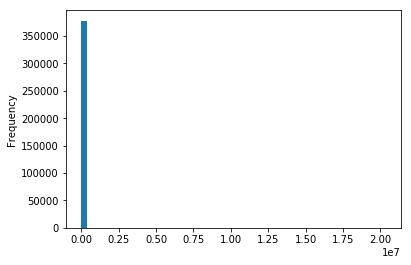

In [106]:
%matplotlib inline
kickstarter_2018.usd_pledged.plot.hist(50)

In [107]:
kickstarter_2018[kickstarter_2018.usd_pledged < 1000].count()

ID                  230103
name                230103
category            230103
main_category       230103
currency            230103
deadline            230103
goal                230103
launched            230103
pledged             230103
state               230103
backers             230103
country             230103
usd_pledged         230103
usd_pledged_real    230103
usd_goal_real       230103
name_weirdness      230103
dtype: int64

#### Ejercicio 6

Calcular los valores atípicos de 'usd_goal_real' y graficar los boxplots, con y sin estos valores por categoría

Vemos la distribución de la variable usd_pledged (financiamiento recibido en dólares)

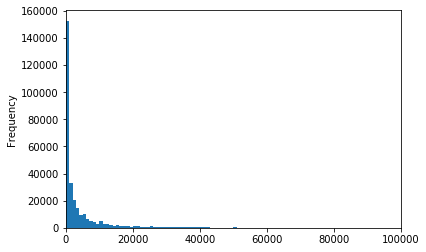

In [108]:
kickstarter_2018[(kickstarter_2018.usd_pledged > 1) & (kickstarter_2018.usd_pledged < 100000)].usd_pledged.plot.hist(xlim=(0, 100000),bins=100)
data = kickstarter_2018[(kickstarter_2018.usd_pledged > 1) & (kickstarter_2018.usd_pledged < 100000)].usd_pledged
#count, bins, vals = (kickstarter_2018[(kickstarter_2018.usd_pledged > 1) & (kickstarter_2018.usd_pledged < 100000)].usd_pledged.plot.hist(xlim=(0, 100000),bins=100))

/home/carla/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


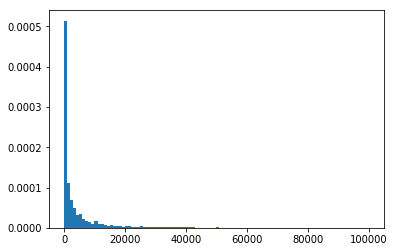

In [109]:
import matplotlib.pyplot as plt
data.values
n, b, patches = plt.hist(data.values, 100, normed=100, histtype='stepfilled')
b_len = len(b)
bnew = [ (x+y)/2 for x, y in zip(b[:b_len-1], b[1:])]

graficamos el logaritmo de la distribución para ver si es de tipo exponencial, pero no da una recta

100 100


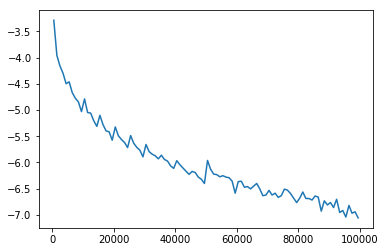

In [110]:
#for nn in n:
#    print (nn, np.log10(nn))
ynew = np.log10(n)
xnew = bnew
print(len(ynew), len(xnew))
import seaborn
seaborn.lineplot(xnew, ynew)

Observamos la distribución del logaritmo de la variable (log(usd_pledged)) y vemos que se asemeja a una normal. La distribución que es normal para el logaritmo de la variable es una lognorm. Los valores que se ven atípicos, son el "0" y algunos otros donde la frecuencia es mayor a la esperada (para esa distribución). El análisis con boxplot para identificar atípicos en este caso no nos parece tan adecuado porque deja afuera una gran cantidad de valores que parecen responder a la misma distribución que el resto.

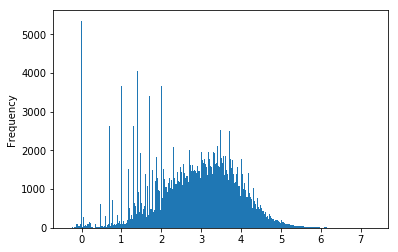

In [111]:
import numpy as np
log_col = pd.Series(np.log10(kickstarter_2018[(kickstarter_2018.usd_pledged>0)].usd_pledged.dropna()))
log_col.plot.hist(bins=500)

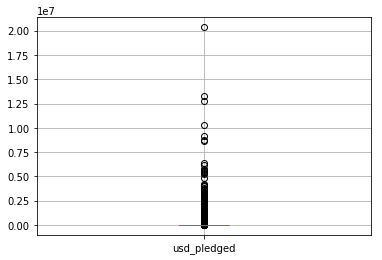

In [112]:
kickstarter_2018.boxplot(column='usd_pledged');

"There are many rules of thumb for how to define an outlier but there is no silver bullet. One rule of thumb is that any data point that is three standard deviations away from the mean of the same data point for all observations."

In [113]:
outliers = kickstarter_2018[kickstarter_2018.usd_pledged > (kickstarter_2018.usd_pledged.mean() + 
                                                            3 * kickstarter_2018.usd_pledged.std())]
outliers

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real,name_weirdness
154,1000629643,ODIN: Android 'Smart' Projector to Carry in Yo...,Hardware,Technology,USD,2014-07-08,250000.00,2014-05-28 13:54:18,268192.00,successful,561,US,268192.00,268192.00,250000.00,0
175,1000725978,"Air Bonsai | Create your ""little star""",Product Design,Design,USD,2016-03-01,80000.00,2016-01-21 12:18:00,843743.00,successful,3784,US,843743.00,843743.00,80000.00,0
330,1001502333,Pimax: The World's First 8K VR Headset,Hardware,Technology,USD,2017-11-03,200000.00,2017-09-19 19:02:23,4236618.49,successful,5946,US,608194.00,4236618.49,200000.00,0
655,1003182869,RinseKit: The Revolutionary Portable Shower,Gadgets,Technology,USD,2016-06-03,30000.00,2016-05-04 19:27:57,396299.00,successful,2412,US,396299.00,396299.00,30000.00,0
1185,1006008989,War for the Overworld,Video Games,Games,GBP,2013-01-03,150000.00,2012-11-29 19:11:23,211371.50,successful,8351,GB,338527.51,338589.87,240280.65,0
1583,1008109037,The Electron: Cellular dev kit with a global d...,DIY Electronics,Technology,USD,2015-04-02,30000.00,2015-02-25 20:15:17,578478.33,successful,5564,US,578478.33,578478.33,30000.00,0
1720,1008826259,"NORTH DRINKWARE : Mt. Hood, The Oregon Pint Glass",Product Design,Design,USD,2015-03-05,15000.00,2015-02-01 14:38:37,531581.00,successful,5620,US,531581.00,531581.00,15000.00,0
3435,101767263,3Doodler: The World's First 3D Printing Pen,Hardware,Technology,USD,2013-03-25,30000.00,2013-02-19 06:08:59,2344134.67,successful,26457,US,2344134.67,2344134.67,30000.00,0
3685,1019039281,The Apocrypha Adventure Card Game,Tabletop Games,Games,USD,2015-05-14,66666.00,2015-04-14 17:00:06,333661.99,successful,2477,US,333661.99,333661.99,66666.00,0
4568,1023336156,Journey: Wrath of Demons,Tabletop Games,Games,USD,2013-11-23,55000.00,2013-10-17 02:00:27,425553.00,successful,1858,US,425553.00,425553.00,55000.00,0


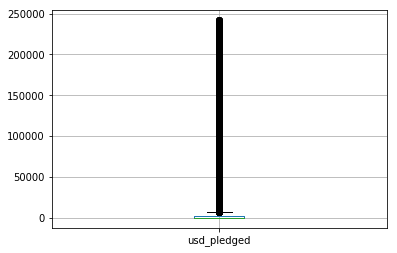

In [114]:
kickstarter_2018.drop(outliers.index).boxplot(column='usd_pledged');

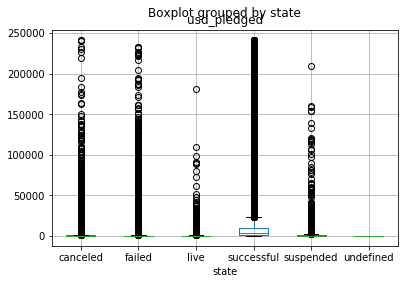

In [115]:
kickstarter_2018.drop(outliers.index).boxplot(column='usd_pledged',by='state');

Analizar outliers por categorías

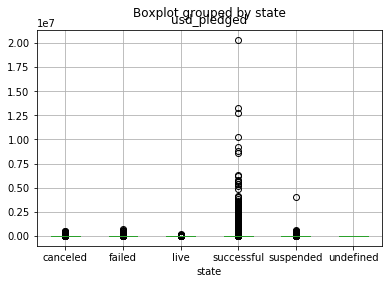

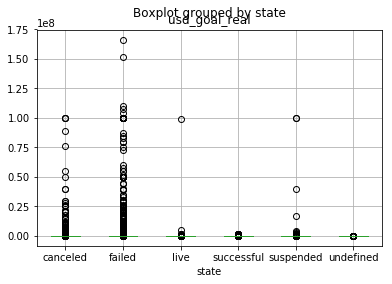

In [116]:
kickstarter_2018.boxplot(column='usd_pledged',by='state');
kickstarter_2018.boxplot(column='usd_goal_real',by='state');

## 2.7. Evaluar cómo comprimir los datos 
para su almacenamiento más eficiente.

En la actualidad, en las nubes el almacenamiento no suele ser problema sino la velocidad para leerlo que suele ser determinante a la hora de determinar el formato de almacenamiento.


## 2.8. Guardar el set de datos con un nombre informativo.


EL problema de la ingeniería de software